In [139]:
from langchain.output_parsers import ResponseSchema
from langchain.output_parsers import StructuredOutputParser
from langchain.output_parsers import StructuredOutputParser, ResponseSchema
from langchain.prompts import PromptTemplate, ChatPromptTemplate, HumanMessagePromptTemplate
from langchain.llms import OpenAI
from langchain.chat_models import ChatOpenAI
import os
import openai
from matplotlib import pyplot as plt 
from langchain.llms import OpenAI
from langchain.chat_models import ChatOpenAI
from langchain.embeddings import OpenAIEmbeddings
from langchain.prompts import ChatPromptTemplate
from langchain.chains import LLMChain
from langchain.chains import SimpleSequentialChain
from langchain.memory import ConversationSummaryBufferMemory
from langchain.chains import ConversationChain

from langchain.output_parsers import ResponseSchema
from langchain.output_parsers import StructuredOutputParser
from langchain.vectorstores import Chroma
from datetime import datetime
from langchain.schema import Document
from langchain.vectorstores.base import VectorStoreRetriever
from langchain.chains import ConversationalRetrievalChain
import cv2
import librosa
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
#from langchain_community.embeddings.sentence_transformer import (SentenceTransformerEmbeddings,)
#embedding_function = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")

In [140]:
from langchain_core.messages import HumanMessage
from langchain import OpenAI
from langchain.prompts import PromptTemplate
import base64


In [141]:
#from huggingface_hub import snapshot_download
#from sentence_transformers import SentenceTransformer
#import os

# Define the model name and cache directory
#model_name_or_path = "sentence-transformers/all-MiniLM-L6-v2"
#cache_folder = "path_to_cache_folder"  # Specify your cache folder path

# Download the model snapshot without using ignore_files
#model_path = snapshot_download(repo_id=model_name_or_path, cache_dir=cache_folder)

# Load the model
#sentence_model = SentenceTransformer(model_path)
#embedding_function=sentence_model

#from langchain_community.embeddings import SentenceTransformerEmbeddings
#embedding_function = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2") 



In [142]:
from langchain_community.embeddings.sentence_transformer import (SentenceTransformerEmbeddings,)
embedding_function = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")

In [143]:
import sounddevice as sd #Library for recording and playing sound
import numpy as np #Library for handling arrays
from scipy.io.wavfile import write #Module for reading and writing WAV files
import keyboard #Module for handling keyboard events
#from transformers import WhisperProcessor, WhisperForConditionalGeneration #Library for loading and using the Whisper model for transcription
import torch #Library for tensor computations (required by transformers).
import librosa #Library for audio processing.
import wave
import json
import pyaudio
import threading
import time
from vosk import Model, KaldiRecognizer

# Initialize Vosk model
model = Model("vosk-model-en-us-0.22")
if model is None:
    print("Error: Vosk model not initialized correctly")
    exit(1)
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")    
#processor_whisper = WhisperProcessor.from_pretrained("openai/whisper-large")
#model_whisper = WhisperForConditionalGeneration.from_pretrained("openai/whisper-large").to(device)

Exception: Failed to create a model

In [ ]:
import pvporcupine
import pyaudio
import struct


# Initialize Porcupine with custom keyword
access_key = "L/UBhKSHvnryG8jSSFcf90oyFUXYyZcxXHgpqlgFY3Eiu0PXY+QZVA=="
custom_keyword_path = "FRIDAY_en_windows_v3_0_0.ppn"  # Replace with the actual path to your custom keyword file

porcupine = pvporcupine.create(
    access_key=access_key,
    keyword_paths=[custom_keyword_path]
)

# Configure PyAudio
pa = pyaudio.PyAudio()
audio_stream = pa.open(
    rate=porcupine.sample_rate,
    channels=1,
    format=pyaudio.paInt16,
    input=True,
    frames_per_buffer=porcupine.frame_length
)

In [ ]:
vectorstore_load=Chroma(persist_directory="./chromadb_data_v2", embedding_function=embedding_function)

In [144]:
openai.api_key = os.getenv("OPENAI_API_KEY")
# account for deprecation of LLM model
import datetime
# Get the current date
current_date = datetime.datetime.now().date()

# Define the date after which the model should be set to "gpt-3.5-turbo"
target_date = datetime.date(2024, 6, 12)

# Set the model variable based on the current date
if current_date > target_date:
    llm_model = "gpt-3.5-turbo"
else:
    llm_model = "gpt-3.5-turbo-0301"

llm = ChatOpenAI(temperature=0.7, model=llm_model, api_key=openai.api_key)

In [145]:
def displayImage(imgI,imgname):
    if imgI.shape[0]>0:
        f = plt.figure()
        f.set_figwidth(12)
        f.set_figheight(9)
        rgb = cv2.cvtColor(imgI, cv2.COLOR_BGR2RGB)
        plt.imshow( rgb  )
        plt.title(imgname)
        plt.show()
    
def displayImageGrey(imgI,imgname):
    if imgI.shape[0]>0:
        f = plt.figure()
        f.set_figwidth(12)
        f.set_figheight(9)
        plt.imshow( imgI )
        plt.title(imgname)
        plt.show()
    
def resizeImgToHeight(imgI,reqH=500.0):
    curH = float(imgI.shape[0])
    curW = float(imgI.shape[1])
    woh = curW/curH
    reqW = woh*reqH
    #imgI2 = cv2.resize(imgI[:], (int(reqW),int(reqH)), interpolation=cv2.INTER_AREA)
    #imgI2 = cv2.resize(imgI[:], (int(reqW),int(reqH)), interpolation=cv2.INTER_LINEAR)
    imgI2 = cv2.resize(imgI[:], (int(reqW),int(reqH)), interpolation=cv2.INTER_CUBIC)
    return imgI2

In [163]:
def getIntFromDatetime(datetime_obj):
    return int(datetime_obj.strftime('%Y%m%d'))
    
def find_most_similar_location(input_location, known_locations, threshold=35):

    best_match = process.extractOne(input_location, known_locations, scorer=fuzz.ratio)
    if best_match[-1]>35:
        return best_match
    else:
        return 0


def imformation_retrival(user_input):
    #1 phase
    # Get user input
    filter_query={}
    known_locations=["Main Korangi Road","DHA Tooba Mosque","Creek Club","Rahat Park","Nisar Shaheed Park","Defence Library","Khadda Market","Southend Club","DHA Sports Club","Imtiaz Supermarket","DHA Zamzama Commercial Area","DHA Golf Club,Karachi American School","Shahbaz Commercial Area","Jami Commercial Area","Creek Marina","Creek Vista Apartments","26th Street","dha business hub"]
    content_schema = ResponseSchema(name="output",description=""" The output should be in a JSON/dictionary format the keys should
    be {"date":"", "time":"", "info":"","location":""} """)
    response_schemas = [content_schema]
    output_parser = StructuredOutputParser.from_response_schemas(response_schemas)
    format_instructions = output_parser.get_format_instructions()
    
    chat = ChatOpenAI(temperature=0.0, model="gpt-3.5-turbo",api_key=openai.api_key)
    
    prompt_template = ChatPromptTemplate.from_template(
    """
    Given the user input, perform the following tasks:
    1. Find the date. If not provided, give None.
    2. Find the time Convert the time to a 24-hour format, removing AM or PM if needed.If not provided, give None 
    3. Extract the location if given by the user a location can be of any place. If not provided, give None.
    4. Extract any insights provided in the input(any specific query).

    Following is the given content: {content}

    ~~Only generate the dictionary and nothing else~~.
    {format_instructions}
    """)
    
    llm_messages = prompt_template.format_messages(content=user_input, format_instructions=format_instructions)
    response = chat(llm_messages)
    
    print(response.content)
    output_dict = output_parser.parse(response.content)

    if output_dict["output"]["time"]:
        if output_dict["output"]["location"]:
            
            time_str=output_dict["output"]["time"]
            from datetime import datetime, timedelta
            try:
                    time_obj = datetime.strptime(time_str, "%H:%M:%S")
            except ValueError:
                try:
                    time_obj = datetime.strptime(time_str, "%H:%M")
                except ValueError:
                    try:
                        time_obj = datetime.strptime(time_str, "%H")
                    except ValueError:
                        raise ValueError("Invalid time format. Please provide time in the format 'HH', 'HH:MM', or 'HH:MM:SS'.")
            
            start_time = time_obj - timedelta(minutes=10)
            end_time = time_obj + timedelta(minutes=10)
            
            # Format the times back to strings in 24-hour format
            start_time_str = start_time.strftime("%H:%M")
            end_time_str = end_time.strftime("%H:%M")
            
            print(f"Start time: {start_time_str}, End time: {end_time_str}") 
                
                
            # 3 phase
            date_hardwork="2024-06-20"
        
            str_formatted_time = datetime.strptime(start_time_str, "%H:%M").strftime("%H:%M:%S")
            print("Formatted time:", str_formatted_time)
            
            end_formatted_time = datetime.strptime(end_time_str, "%H:%M").strftime("%H:%M:%S")
            print("Formatted time:", end_formatted_time)
            
            # Combine the date and time
            str_date_time_str = f"{date_hardwork} {str_formatted_time}"
            end_date_time_str = f"{date_hardwork} {end_formatted_time}"
            # Create the datetime object
            start_date_time_obj = datetime.strptime(str_date_time_str, "%Y-%m-%d %H:%M:%S")
            end_date_time_obj = datetime.strptime(end_date_time_str, "%Y-%m-%d %H:%M:%S")
            print(start_date_time_obj,"<<--->>",end_date_time_obj)
            # 4 phase
            timestamp_s = start_date_time_obj.timestamp()
            timestamp_e = end_date_time_obj.timestamp()
            print("Timestamp_start:", timestamp_s)
            print("Timestamp_end:", timestamp_e)
            
            best_match=find_most_similar_location(output_dict["output"]["location"], known_locations, threshold=35)
            
            if best_match[-1]==0:
                print("no action")
            else:
                filter_query = {'$and': [{'time_stamp': {'$gte': timestamp_s}}, {'time_stamp': {'$lte': timestamp_e}},{"location":best_match[0]}]}
    

    if output_dict["output"]["time"]:
        
        time_str=output_dict["output"]["time"]
        from datetime import datetime, timedelta
        try:
                time_obj = datetime.strptime(time_str, "%H:%M:%S")
        except ValueError:
            try:
                time_obj = datetime.strptime(time_str, "%H:%M")
            except ValueError:
                try:
                    time_obj = datetime.strptime(time_str, "%H")
                except ValueError:
                    raise ValueError("Invalid time format. Please provide time in the format 'HH', 'HH:MM', or 'HH:MM:SS'.")
        
        start_time = time_obj - timedelta(minutes=10)
        end_time = time_obj + timedelta(minutes=10)
        
        # Format the times back to strings in 24-hour format
        start_time_str = start_time.strftime("%H:%M")
        end_time_str = end_time.strftime("%H:%M")
        
        #print(f"Start time: {start_time_str}, End time: {end_time_str}") 
            
            
        # 3 phase
        date_hardwork="2024-06-20"
    
        str_formatted_time = datetime.strptime(start_time_str, "%H:%M").strftime("%H:%M:%S")
        #print("Formatted time:", str_formatted_time)
        
        end_formatted_time = datetime.strptime(end_time_str, "%H:%M").strftime("%H:%M:%S")
        #print("Formatted time:", end_formatted_time)
        
        # Combine the date and time
        str_date_time_str = f"{date_hardwork} {str_formatted_time}"
        end_date_time_str = f"{date_hardwork} {end_formatted_time}"
        # Create the datetime object
        start_date_time_obj = datetime.strptime(str_date_time_str, "%Y-%m-%d %H:%M:%S")
        end_date_time_obj = datetime.strptime(end_date_time_str, "%Y-%m-%d %H:%M:%S")
        #print(start_date_time_obj,"<<--->>",end_date_time_obj)
        # 4 phase
        timestamp_s = start_date_time_obj.timestamp()
        timestamp_e = end_date_time_obj.timestamp()
        #print("Timestamp_start:", timestamp_s)
        #print("Timestamp_end:", timestamp_e)
    
        filter_query = {'$and': [{'time_stamp': {'$gte': timestamp_s}}, {'time_stamp': {'$lte': timestamp_e}}]}

    
    elif output_dict["output"]["location"]:
        best_match=find_most_similar_location(output_dict["output"]["location"], known_locations, threshold=35)
        if best_match[-1]==0:
            #print("no action")
            FUN=1
        else:
            filter_query = {"location":best_match[0]}
 
        
    
    print("Filter Query: ",filter_query)
    vectorstore_load=Chroma(persist_directory="./chromadb_data_v2", embedding_function=embedding_function)
    K=5
    chosen=""
    chroma_retriever = VectorStoreRetriever(vectorstore=vectorstore_load, search_kwargs={"filter":filter_query,"k":K},)
    retrieved_docs = chroma_retriever.get_relevant_documents(output_dict["output"]["info"])
    #print(len(retrieved_docs))
    
    """
    if output_dict["output"]["info"]:
        filtered_results = vectorstore_load.similarity_search(output_dict["output"]["info"])
        print("I am in")
        if len(retrieved_docs)>0:
            for i in range(len(retrieved_docs)):
                if str(filtered_results[0].metadata["path"])==str(retrieved_docs[i].metadata["path"]):
                    chosen=filtered_results[0].metadata["path"]
            print(chosen)
        else:
            chosen=filtered_results[0].metadata["path"]
    """
    if len(retrieved_docs)>0:
        chosen=str(retrieved_docs[0].metadata["path"])

     
    if  chosen:   
        chat = ChatOpenAI(temperature=0.7, model="gpt-4o",api_key=openai.api_key)
        image_path=chosen
        model = ChatOpenAI(model="gpt-4o")
        with open(image_path,"rb") as image_file:
            image_data=base64.b64encode(image_file.read()).decode("utf=8")


        print("Response:")
        loc=retrieved_docs[0].metadata["location"]
        date_p=retrieved_docs[0].metadata["date"]
        time_p=retrieved_docs[0].metadata["time"]
        print(f"location:{loc}         date & time:{date_p},{time_p}")

        
        content_prompt="Describe what is going on in the image write it in the past tense"
        message=HumanMessage(
            content=[
                {"type":"text","text":content_prompt},
                {
                    "type":"image_url",
                    "image_url":{"url":f"data:image/jpeg;base64,{image_data}"},
                },
            ],
        )
        response= model.invoke([message])
        print(response.content)
        
        #st.image(chossen_image, caption='Image:', use_column_width=True)
        chossen_image=cv2.imread(image_path)
        displayImage(chossen_image,"Image")
        
        from openai import OpenAI
    
        client = OpenAI()
        
        response = client.audio.speech.create(
            model="tts-1",
            voice="nova",
            input=response.content,
        )
        
        response.stream_to_file("output_final.mp3")
        
        
        # Load the MP3 file
        audio_path = "output_final.mp3"
        y, sr = librosa.load(audio_path, sr=None)
        
        # Print basic information
        print(f"Sample rate: {sr}")
        print(f"Audio duration: {librosa.get_duration(y=y, sr=sr)} seconds")
        
        # Play audio (optional, requires sounddevice or IPython.display)
        import sounddevice as sd
        sd.play(y, sr)
        sd.wait()  # Wait until audio is finished playing

    else:
        print("NO DOCUMENT RETRIVED")
    


In [152]:
"""
# Constants
CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 16000
SILENCE_TIMEOUT = 5   # Timeout in seconds

# Global variables
recording = False
frames = []
audio = None  # Initialize audio globally

# Function to record audio and perform speech recognition
def record_and_recognize():
    global recording, frames, audio
    audio = pyaudio.PyAudio()
    stream = audio.open(format=FORMAT, channels=CHANNELS,
                        rate=RATE, input=True,
                        frames_per_buffer=CHUNK)
    recognizer = KaldiRecognizer(model, RATE)
    recognizer.SetWords(True)

    print("Recording...")

    last_word_time = time.time()
    while recording:
        data = stream.read(CHUNK)
        frames.append(data)

        if recognizer.AcceptWaveform(data):
            result = json.loads(recognizer.Result())
            if 'result' in result:
                for word in result['result']:
                    start_timestamp = word['start']
                    end_timestamp = word['end']
                    print(f"Word: {word['word']}, Start Time: {start_timestamp:.2f}s, End Time: {end_timestamp:.2f}s")
                    last_word_time = time.time()

        # Check for silence timeout
        if time.time() - last_word_time > SILENCE_TIMEOUT:
            print(f"No word detected for {SILENCE_TIMEOUT} seconds. Stopping recording.")
            stop_recording()
            break

    stream.stop_stream()
    stream.close()
    audio.terminate()

# Function to start recording
def start_recording():
    global recording, frames
    frames = []  # Clear frames
    recording = True
    threading.Thread(target=record_and_recognize).start()

# Function to stop recording
def stop_recording():
    global recording, frames, audio
    recording = False

    if audio is None:
        print("Error: Audio object is not initialized.")
        return

    wf = wave.open("output.wav", "wb")
    wf.setnchannels(CHANNELS)
    wf.setsampwidth(audio.get_sample_size(FORMAT))
    wf.setframerate(RATE)
    wf.writeframes(b''.join(frames))
    wf.close()

    # Load the MP3 file
    audio_path = "friday_wait.mp3"
    y, sr = librosa.load(audio_path, sr=None)
    
    # Print basic information
    print(f"Sample rate: {sr}")
    print(f"Audio duration: {librosa.get_duration(y=y, sr=sr)} seconds")
    
    # Play audio (optional, requires sounddevice or IPython.display)
    import sounddevice as sd
    sd.play(y, sr)
    sd.wait()  # Wait until audio is finished playing

    
    # Perform recognition on saved audio file
    from openai import OpenAI
    client = OpenAI()
    
    audio_file= open("output.wav", "rb")
    transcription = client.audio.transcriptions.create(
      model="whisper-1", 
      file=audio_file
    )
    print(transcription.text)
    user_input=transcription.text
    imformation_retrival(user_input)

def transcribe_audio(audio_path):
    
    print("Transcribing audio...")
    audio, rate = librosa.load(audio_path, sr=16000)
    input_features = processor_whisper(audio, sampling_rate=rate, return_tensors="pt").input_features
    with torch.no_grad():
        predicted_ids = model_whisper.generate(input_features)
    transcription = processor_whisper.batch_decode(predicted_ids, skip_special_tokens=True)[0]
    print("Transcription:")
    print(transcription)
    return transcription


def get_next_audio_frame():
    try:
        pcm = audio_stream.read(porcupine.frame_length, exception_on_overflow=False)
        return struct.unpack_from("h" * porcupine.frame_length, pcm)
    except Exception as e:
        #print(f"Error capturing audio: {e}")
        return None



#Main

print("Listening for custom wake word...")
while True:
    audio_frame = get_next_audio_frame()
    if audio_frame is not None:
        keyword_index = porcupine.process(audio_frame)
        if keyword_index >= 0:
            print("YES!!")
            # Load the MP3 file
            audio_path = "friday_response.mp3"
            y, sr = librosa.load(audio_path, sr=None)
            
            # Print basic information
            print(f"Sample rate: {sr}")
            print(f"Audio duration: {librosa.get_duration(y=y, sr=sr)} seconds")
            
            # Play audio (optional, requires sounddevice or IPython.display)
            import sounddevice as sd
            sd.play(y, sr)
            sd.wait()  
            start_recording()
            #break
"""

'\n# Constants\nCHUNK = 1024\nFORMAT = pyaudio.paInt16\nCHANNELS = 1\nRATE = 16000\nSILENCE_TIMEOUT = 5   # Timeout in seconds\n\n# Global variables\nrecording = False\nframes = []\naudio = None  # Initialize audio globally\n\n# Function to record audio and perform speech recognition\ndef record_and_recognize():\n    global recording, frames, audio\n    audio = pyaudio.PyAudio()\n    stream = audio.open(format=FORMAT, channels=CHANNELS,\n                        rate=RATE, input=True,\n                        frames_per_buffer=CHUNK)\n    recognizer = KaldiRecognizer(model, RATE)\n    recognizer.SetWords(True)\n\n    print("Recording...")\n\n    last_word_time = time.time()\n    while recording:\n        data = stream.read(CHUNK)\n        frames.append(data)\n\n        if recognizer.AcceptWaveform(data):\n            result = json.loads(recognizer.Result())\n            if \'result\' in result:\n                for word in result[\'result\']:\n                    start_timestamp = word[

Sample rate: 24000
Audio duration: 1.152 seconds
```json
{
	"output": {
		"date": null,
		"time": null,
		"info": "What did you see at dha hub",
		"location": "dha hub"
	}
}
```
Filter Query:  {'location': 'dha business hub'}
Response:
location:dha business hub         date & time:2024-06-20,12:21:50
The image depicted a street scene in an urban area. The road was lined with multiple buildings on both sides, including commercial establishments with signage visible. A few cars were parked along the sides, and a small white vehicle was driving down the center of the road. There were also several electric poles and wires visible, indicating a well-developed infrastructure. Some trees and greenery provided a touch of nature amidst the urban environment. In the background, a person on a motorbike was noticeable, and a couple of people were sitting by the roadside, possibly waiting or resting. The overall atmosphere suggested a typical busy day in the city.


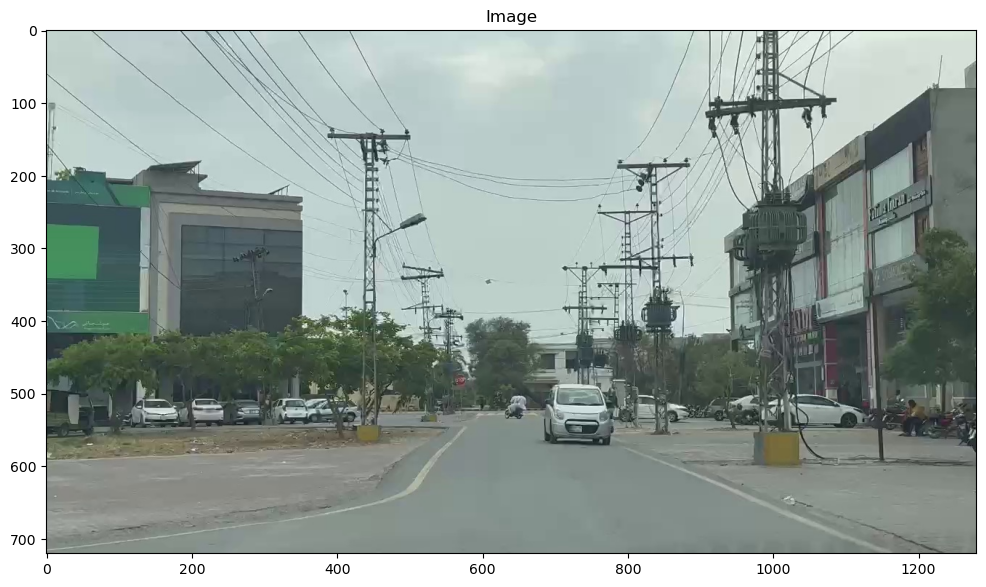

C:\Users\Maria Waheed\AppData\Local\Temp\ipykernel_16152\3708162489.py:227: DeprecationWarning: Due to a bug, this method doesn't actually stream the response content, `.with_streaming_response.method()` should be used instead
  response.stream_to_file("output_final.mp3")


Sample rate: 24000
Audio duration: 41.04 seconds


In [148]:
# Global variables
# Constants
CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 16000
SILENCE_TIMEOUT = 5   # Timeout in seconds

# Global variables
recording = False
frames = []
audio = None  # Initialize audio globally

# Function to record audio and perform speech recognition
def record_and_recognize():
    global recording, frames, audio
    audio = pyaudio.PyAudio()
    stream = audio.open(format=FORMAT, channels=CHANNELS,
                        rate=RATE, input=True,
                        frames_per_buffer=CHUNK)
    recognizer = KaldiRecognizer(model, RATE)
    recognizer.SetWords(True)

    print("Recording... Press '2' to stop.")

    while recording:
        data = stream.read(CHUNK)
        frames.append(data)

        if recognizer.AcceptWaveform(data):
            result = json.loads(recognizer.Result())
            if 'result' in result:
                for word in result['result']:
                    start_timestamp = word['start']
                    end_timestamp = word['end']
                    print(f"Word: {word['word']}, Start Time: {start_timestamp:.2f}s, End Time: {end_timestamp:.2f}s")

    stream.stop_stream()
    stream.close()
    audio.terminate()

# Function to start recording
def start_recording():
    global recording, frames
    frames = []  # Clear frames
    recording = True
    threading.Thread(target=record_and_recognize).start()

# Function to stop recording
def stop_recording():
    global recording, frames, audio
    recording = False

    if audio is None:
        print("Error: Audio object is not initialized.")
        return

    wf = wave.open("output.wav", "wb")
    wf.setnchannels(CHANNELS)
    wf.setsampwidth(audio.get_sample_size(FORMAT))
    wf.setframerate(RATE)
    wf.writeframes(b''.join(frames))
    wf.close()

    # Perform recognition on saved audio file
    #recognize_audio("output.wav")
    
    
# Function to recognize audio
def recognize_audio(filename):
    wf = wave.open(filename, 'rb')

    if wf.getnchannels() != 1 or wf.getsampwidth() != 2 or wf.getframerate() != RATE:
        print("Audio file must be WAV format mono PCM at 16000 Hz")
        wf.close()
        return

    recognizer = KaldiRecognizer(model, RATE)
    recognizer.SetWords(True)
    recognized_text = ""
    timestamps = []

    while True:
        data = wf.readframes(CHUNK)
        if len(data) == 0:
            break
        if recognizer.AcceptWaveform(data):
            result = json.loads(recognizer.Result())
            if 'result' in result:
                for word in result['result']:
                    start_timestamp = word['start']
                    end_timestamp = word['end']
                    recognized_text += f"{word['word']} "
                    timestamps.append((word['word'], start_timestamp, end_timestamp))
            elif 'text' in result:
                recognized_text += result['text'] + " "

    final_result = json.loads(recognizer.FinalResult())
    if 'result' in final_result:
        for word in final_result['result']:
            start_timestamp = word['start']
            end_timestamp = word['end']
            recognized_text += f"{word['word']} "
            timestamps.append((word['word'], start_timestamp, end_timestamp))
    elif 'text' in final_result:
        recognized_text += final_result['text'] + " "

    print("\nRecognized Text:")
    print(recognized_text.strip())

    recognized_words = recognized_text.split()
    total_words = len(recognized_words)
    print(f"\nTotal number of words: {total_words}")

    if timestamps:
        print("\nTimestamps:")
        for word, start, end in timestamps:
            print(f"Word: {word}, Start Time: {start:.2f}s, End Time: {end:.2f}s")
    else:
        print("No word-level timestamps available.")

    wf.close()

# Main loop
#print("Listening for custom wake word...")
"""
while True:   
    print("Press '1' to start recording, '2' to stop recording and recognize, '0' to exit")
    user_input = input().strip()

    if user_input == '1':
        audio_path = "friday_response.mp3"
        y, sr = librosa.load(audio_path, sr=None)
        
        # Print basic information
        print(f"Sample rate: {sr}")
        print(f"Audio duration: {librosa.get_duration(y=y, sr=sr)} seconds")
        
        # Play audio (optional, requires sounddevice or IPython.display)
        import sounddevice as sd
        sd.play(y, sr)
        sd.wait()  
        
        start_recording()
        
    elif user_input == '2':
        stop_recording()
        # Load the MP3 file
        audio_path = "friday_wait.mp3"
        y, sr = librosa.load(audio_path, sr=None)
        
        # Print basic information
        print(f"Sample rate: {sr}")
        print(f"Audio duration: {librosa.get_duration(y=y, sr=sr)} seconds")
        
        # Play audio (optional, requires sounddevice or IPython.display)
        import sounddevice as sd
        sd.play(y, sr)
        sd.wait()  # Wait until audio is finished playing
    
        
        # Perform recognition on saved audio file
        
        from openai import OpenAI
        client = OpenAI()
        
        audio_file= open("output.wav", "rb")
        transcription = client.audio.transcriptions.create(
          model="whisper-1", 
          file=audio_file
        )
        
        print(transcription.text)
        """
        #user_input=transcription.text
        #user_input="what was the Imtiaz store"

user_input="What did you see at dha hub"
audio_path = "friday_wait.mp3"
y, sr = librosa.load(audio_path, sr=None)

# Print basic information
print(f"Sample rate: {sr}")
print(f"Audio duration: {librosa.get_duration(y=y, sr=sr)} seconds")

# Play audio (optional, requires sounddevice or IPython.display)
import sounddevice as sd
sd.play(y, sr)
sd.wait()  # Wait until audio is finished playing

imformation_retrival(user_input)
        

Sample rate: 24000
Audio duration: 1.152 seconds
```json
{
	"output": {
		"date": null,
		"time": "12:12",
		"info": "What did we see",
		"location": null
	}
}
```
Filter Query:  {'$and': [{'time_stamp': {'$gte': 1718866920.0}}, {'time_stamp': {'$lte': 1718868120.0}}]}
Response:
location:Southend Club         date & time:2024-06-20,12:12:25
In the image, several cars were driving on a two-lane road lined with trees and billboards. One of the billboards on the left side advertised an app with images of smartphones, while another billboard promoted a fruit market. The road was bordered by a sidewalk with neatly trimmed bushes and palm trees. The sky was overcast, and the cars appeared to be moving at a moderate speed. The scene depicted typical urban traffic with vehicles traveling in the same direction.


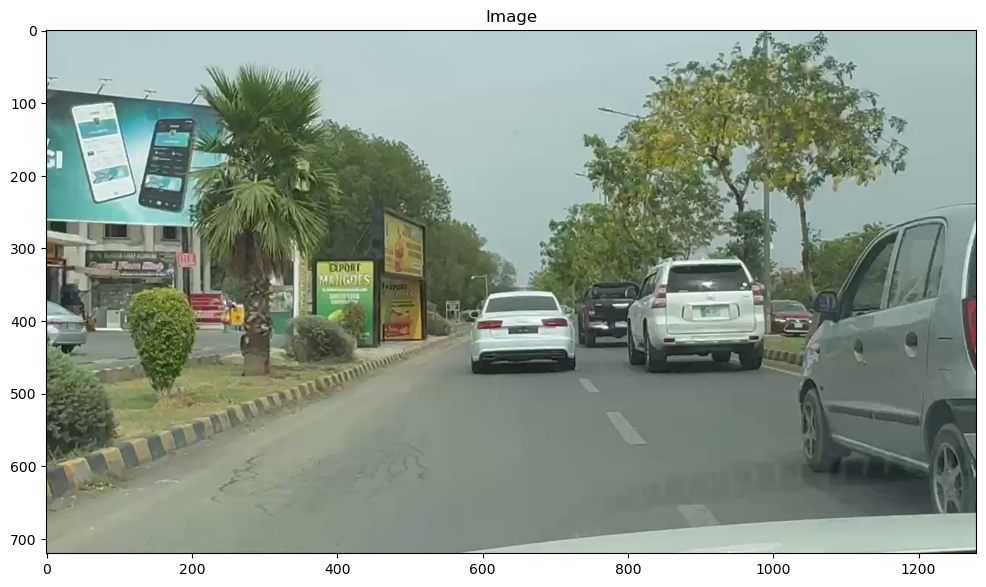

C:\Users\Maria Waheed\AppData\Local\Temp\ipykernel_16152\364948655.py:228: DeprecationWarning: Due to a bug, this method doesn't actually stream the response content, `.with_streaming_response.method()` should be used instead
  response.stream_to_file("output_final.mp3")


Sample rate: 24000
Audio duration: 29.04 seconds


In [164]:
user_input="What did we see around 12:12"
audio_path = "friday_wait.mp3"
y, sr = librosa.load(audio_path, sr=None)

# Print basic information
print(f"Sample rate: {sr}")
print(f"Audio duration: {librosa.get_duration(y=y, sr=sr)} seconds")

# Play audio (optional, requires sounddevice or IPython.display)
import sounddevice as sd
sd.play(y, sr)
sd.wait()  # Wait until audio is finished playing

imformation_retrival(user_input)

Sample rate: 24000
Audio duration: 1.152 seconds
```json
{
	"output": {
		"date": null,
		"time": null,
		"info": "Did we come across a license plate number:LWA3681",
		"location": null
	}
}
```
Filter Query:  {}
Response:
location:Khadda Market         date & time:2024-06-20,12:11:10
The image depicted a traffic scene with several vehicles on the road. A black pickup truck, a grey sedan, and a silver Hyundai were seen in close proximity. The vehicles appeared to be in a congested area, possibly waiting at a traffic signal. In the background, there were electric poles and trees, and a person on the left side of the image was partially visible. The environment suggested an urban setting with moderate to heavy traffic.


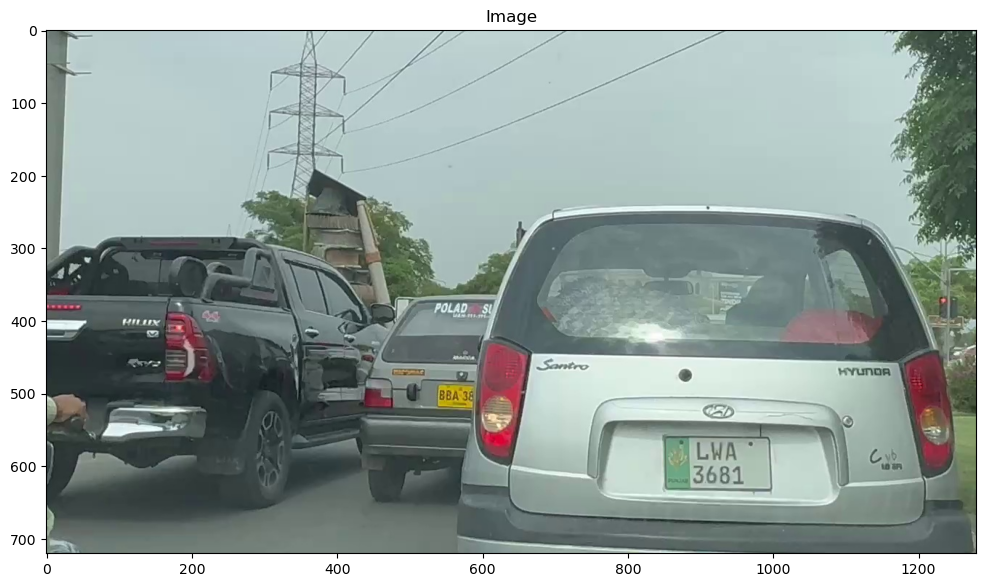

C:\Users\Maria Waheed\AppData\Local\Temp\ipykernel_16152\216778425.py:228: DeprecationWarning: Due to a bug, this method doesn't actually stream the response content, `.with_streaming_response.method()` should be used instead
  response.stream_to_file("output_final.mp3")


Sample rate: 24000
Audio duration: 27.216 seconds


In [154]:
user_input="Did we come across a license plate number:LWA3681"
audio_path = "friday_wait.mp3"
y, sr = librosa.load(audio_path, sr=None)

# Print basic information
print(f"Sample rate: {sr}")
print(f"Audio duration: {librosa.get_duration(y=y, sr=sr)} seconds")

# Play audio (optional, requires sounddevice or IPython.display)
import sounddevice as sd
sd.play(y, sr)
sd.wait()  # Wait until audio is finished playing

imformation_retrival(user_input)

In [11]:
import time
start_time = time.time()
#user_input=transcribe_audio("output.wav")
from openai import OpenAI
client = OpenAI()

audio_file= open("test_output1.wav", "rb")
transcription = client.audio.transcriptions.create(
  model="whisper-1", 
  file=audio_file
)
print(transcription.text)
elapsed_time=time.time() - start_time

Did we pass MTR supermarket on our way?


In [12]:
 minutes, seconds = divmod(elapsed_time, 60)

In [ ]:
imformation_retrival(user_input)

In [ ]:
import librosa

# Load the MP3 file
audio_path = "output_final.mp3"
y, sr = librosa.load(audio_path, sr=None)

# Print basic information
print(f"Sample rate: {sr}")
print(f"Audio duration: {librosa.get_duration(y=y, sr=sr)} seconds")

# Play audio (optional, requires sounddevice or IPython.display)
import sounddevice as sd
sd.play(y, sr)
sd.wait()  # Wait until audio is finished playing

In [ ]:
#old prompt!
"""
prompt_template = ChatPromptTemplate.from_template(
        Given the user input find the date and time if not provided add null; convert it in time format remove PM
       or AM if needed and if a time range is given pick the first time also extract the insight if any is provided:
       Following is the given content{content}
       
        ~~Only generate the dictionary and nothing else~~.
        {format_instructions}
        
    )
"""

In [ ]:

from openai import OpenAI

client = OpenAI()

response = client.audio.speech.create(
    model="tts-1",
    voice="nova",
    input="Wait! let me recall.",
)

response.stream_to_file("friday_wait.mp3")


In [ ]:
"""
from transformers import SpeechT5Processor, SpeechT5ForTextToSpeech, SpeechT5HifiGan, set_seed
import torch

processor = SpeechT5Processor.from_pretrained("microsoft/speecht5_tts")
model = SpeechT5ForTextToSpeech.from_pretrained("microsoft/speecht5_tts")
vocoder = SpeechT5HifiGan.from_pretrained("microsoft/speecht5_hifigan")

inputs = processor(text=text_prompt, return_tensors="pt")
speaker_embeddings = torch.zeros((1, 512))  # or load xvectors from a file

set_seed(555)  # make deterministic

# generate speech
speech = model.generate(inputs["input_ids"], speaker_embeddings=speaker_embeddings, vocoder=vocoder)
speech.shape
"""

In [ ]:
"""
text_prompt="The image depicts a scene of a multi-lane highway with light traffic.\
There are a few vehicles visible on the road, including a car in the middle lane and a truck\
further ahead. The highway is flanked by trees on both sides, and the weather appears to be\
clear with good visibility. The road is divided by white lane markings, and there are\
streetlights along the median. An overhead structure, possibly an overpass or sign frame,\
is visible at the top of the image. The overall impression is of a calm and orderly drive\
on a well-maintained highway."
"""

In [ ]:
"""
import torchaudio
from pydub import AudioSegment
from pydub.playback import play

#speech_filename = "output_speech.wav"
#torchaudio.save(speech_filename, speech, sample_rate=16000)

#audio = AudioSegment.from_wav(speech_filename)
#play(audio)

import IPython.display as ipd
speech_array = speech.detach().cpu().numpy().flatten()
ipd.display(ipd.Audio(data=speech_array, rate=16000))
"""

In [ ]:
from langchain_community.embeddings import SentenceTransformerEmbeddings

embeddings = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2") 

doc_result = embeddings.embed_documents(["text", "This is not a test document."])

In [ ]:
"""
from transformers import pipeline

pipe = pipeline("text-to-speech", model="suno/bark-small")
text = "[clears throat] This is a test ... and I just took a long pause."
output = pipe(text)
"""

In [ ]:
"""
from transformers import AutoProcessor, BarkModel

processor = AutoProcessor.from_pretrained("suno/bark")
model = BarkModel.from_pretrained("suno/bark")

#inputs = processor("Hello, my dog is cute", voice_preset="v2/en_speaker_9")

#audio_array = model.generate(**inputs)
#audio_array = audio_array.cpu().numpy().squeeze()
"""

In [ ]:
#from IPython.display import Audio
#Audio(output["audio"], rate=output["sampling_rate"])

In [ ]:
#from IPython.display import Audio
#from bark import SAMPLE_RATE, generate_audio, preload_models
#audio_array = generate_audio(text_prompt)

In [ ]:
#from IPython.display import Audio

#sample_rate = model.generation_config.sample_rate
#Audio(audio_array, rate=sample_rate)

In [ ]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

def find_most_similar_location(input_location, known_locations, threshold=35):

    best_match = process.extractOne(input_location, known_locations, scorer=fuzz.ratio)
    if best_match[-1]>35:
        return best_match
    else:
        return (0,0)


In [166]:
input_location="a"#output_dict["output"]["location"]
known_locations=["Main Korangi Road","DHA Tooba Mosque","Creek Club","Rahat Park","Nisar Shaheed Park","Defence Library","Khadda Market","Southend Club","DHA Sports Club","Imtiaz Supermarket","DHA Zamzama Commercial Area","DHA Golf Club,Karachi American School","Shahbaz Commercial Area","Jami Commercial Area","Creek Marina","Creek Vista Apartments","26th Street","dha business hub"]
#best_match=find_most_similar_location(input_location, known_locations, threshold=35)

In [168]:
len(known_locations)

18